# EDA DROUGHT o SEQUÍA

Usando dataset ../../Data/01CrudoNoEditar/01desastres_crudo_renamedcols.csv

## 1. IMPORTAR LIBRERÍAS

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. CARGAR DATASET

In [36]:
df = pd.read_csv('../../Data/01CrudoNoEditar/01desastres_crudo_renamedcols.csv', delimiter=';', encoding= 'utf-8')


C:\Users\blanc\AppData\Local\Temp\ipykernel_3844\3889873488.py:1: DtypeWarning: Columns (18,24,25,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Data/01CrudoNoEditar/01desastres_crudo_renamedcols.csv', delimiter=';', encoding= 'utf-8')


## ANÁLISIS BÁSICO

In [37]:
df.head(3)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,Reconstruction Costs Adj,Insured Damages,Insured Damages Adj,Total Damages,Total Damages Adj,CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"2,849084409",NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"2,849084409",NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,843726.0,"2,963047785",NaN,NaN,NaN,NaN


In [38]:
df.shape

(16636, 50)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dis No                    16636 non-null  object 
 1   Year                      16636 non-null  int64  
 2   Seq                       16636 non-null  int64  
 3   Glide                     1736 non-null   object 
 4   Disaster Group            16636 non-null  object 
 5   Disaster Subgroup         16636 non-null  object 
 6   Disaster Type             16636 non-null  object 
 7   Disaster Subtype          13313 non-null  object 
 8   Disaster Subsubtype       1117 non-null   object 
 9   Event Name                3969 non-null   object 
 10  Country                   16636 non-null  object 
 11  ISO                       16636 non-null  object 
 12  Region                    16636 non-null  object 
 13  Continent                 16636 non-null  object 
 14  Locati

In [40]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs', 'Reconstruction Costs Adj',
       'Insured Damages', 'Insured Damages Adj', 'Total Damages',
       'Total Damages Adj', 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code',
       'Geo Locations'],
      dtype='object')

## 3. FILTRO PARA DROUGHT

In [50]:
drought_filter = (df['Disaster Type'] == 'Drought')
df_drought = df[drought_filter]

In [51]:
df_drought.head(5)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,Reconstruction Costs Adj,Insured Damages,Insured Damages Adj,Total Damages,Total Damages Adj,CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"2,849084409",NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"2,849084409",NaN,NaN,NaN,NaN
24,1910-9006-BFA,1910,9006,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"3,190974538",NaN,NaN,NaN,NaN
27,1910-9006-CPV,1910,9006,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"3,190974538",NaN,NaN,NaN,NaN
30,1910-9006-GMB,1910,9006,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"3,190974538",NaN,NaN,NaN,NaN


### 3.1. ANÁLISIS BÁSICO PARA DF_DROUGHT

In [52]:
df_drought.shape # Tenemos 803 eventos de sequía

(803, 50)

In [54]:
df_drought.isnull().sum()

Dis No                        0
Year                          0
Seq                           0
Glide                       702
Disaster Group                0
Disaster Subgroup             0
Disaster Type                 0
Disaster Subtype              1
Disaster Subsubtype         803
Event Name                  803
Country                       0
ISO                           0
Region                        0
Continent                     0
Location                    171
Origin                      638
Associated Dis              513
Associated Dis2             760
OFDA Response               625
Appeal                      614
Declaration                 537
AID Contribution            770
Dis Mag Value               752
Dis Mag Scale                 0
Latitude                    803
Longitude                   803
Local Time                  803
River Basin                 803
Start Year                    0
Start Month                 186
Start Day                   790
End Year

In [55]:
df_drought.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 16557
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Dis No                    803 non-null    object 
 1   Year                      803 non-null    int64  
 2   Seq                       803 non-null    int64  
 3   Glide                     101 non-null    object 
 4   Disaster Group            803 non-null    object 
 5   Disaster Subgroup         803 non-null    object 
 6   Disaster Type             803 non-null    object 
 7   Disaster Subtype          802 non-null    object 
 8   Disaster Subsubtype       0 non-null      object 
 9   Event Name                0 non-null      object 
 10  Country                   803 non-null    object 
 11  ISO                       803 non-null    object 
 12  Region                    803 non-null    object 
 13  Continent                 803 non-null    object 
 14  Location

### 3.2. ANÁLISIS GEOGRÁFICO DE SEQUÍAS
Usando columnas Location, Country, Region, Continent

### * Análisis básico

In [56]:
df_drought_geografical = df[drought_filter][['Location', 'Country', 'Region', 'Continent']]
df_drought_geografical.shape

(803, 4)

In [111]:
df_drought_geografical.head(5)

,Location,Country,Region,Continent
0,Countrywide,Cabo Verde,Western Africa,Africa
1,Bengal,India,Southern Asia,Asia
24,NaN,Burkina Faso,Western Africa,Africa
27,NaN,Cabo Verde,Western Africa,Africa
30,NaN,Gambia (the),Western Africa,Africa


In [58]:
df_drought_geografical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 803 entries, 0 to 16557
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Location   632 non-null    object
 1   Country    803 non-null    object
 2   Region     803 non-null    object
 3   Continent  803 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [108]:
df_drought_geografical.isnull().sum()

Location     171
Country        0
Region         0
Continent      0
dtype: int64

### * Distribución geográfica de sequías

** Continente

In [59]:
df_drought_geografical['Continent'].value_counts()

Africa      361
Asia        188
Americas    172
Europe       49
Oceania      33
Name: Continent, dtype: int64

** Región

In [60]:
df_drought_geografical['Region'].value_counts()

Eastern Africa               150
Western Africa               112
South America                 70
Eastern Asia                  56
South-Eastern Asia            55
Southern Asia                 54
Central America               49
Southern Africa               44
Middle Africa                 34
Caribbean                     29
Northern America              24
Northern Africa               21
Southern Europe               20
Western Asia                  18
Eastern Europe                17
Australia and New Zealand     13
Melanesia                      9
Micronesia                     7
Western Europe                 6
Northern Europe                5
Central Asia                   5
Polynesia                      4
Russian Federation             1
Name: Region, dtype: int64

** Países

In [61]:
df_drought_geografical['Country'].value_counts()

China                                                         41
Brazil                                                        21
United States of America (the)                                19
Ethiopia                                                      18
Kenya                                                         17
                                                              ..
Mongolia                                                       1
Georgia                                                        1
Algeria                                                        1
Yugoslavia                                                     1
United Kingdom of Great Britain and Northern Ireland (the)     1
Name: Country, Length: 149, dtype: int64

** Ubicación

In [62]:
df_drought_geografical['Location'].value_counts()

Countrywide                                                                                                                                                                                                                                                    15
Nationwide                                                                                                                                                                                                                                                     11
North                                                                                                                                                                                                                                                           4
Central                                                                                                                                                                                                                           

### * Visualización de la distribución geográfica de sequías

** Distribución de sequías por continente

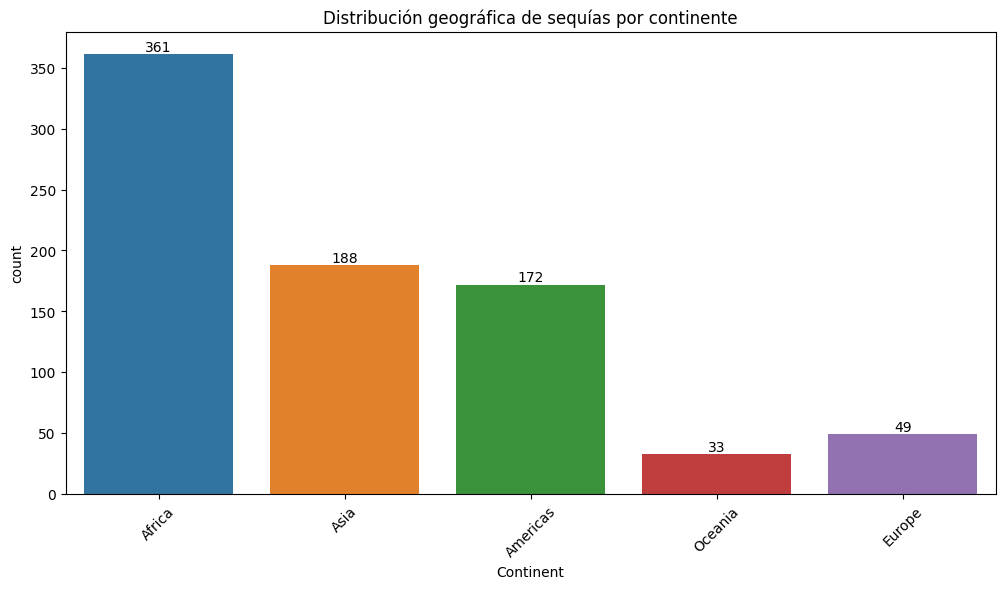

In [66]:
plt.figure(figsize=(12,6))
ax =sns.countplot(data=df_drought_geografical, x= 'Continent')
plt.title('Distribución geográfica de sequías por continente')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0]); 

África es el continente con un mayor número de sequías contabilizadas, 361, cantidad que casi duplica el número de eventos producidos en Asia seguido a muy poca distancia de América

** Distribución de sequías por región

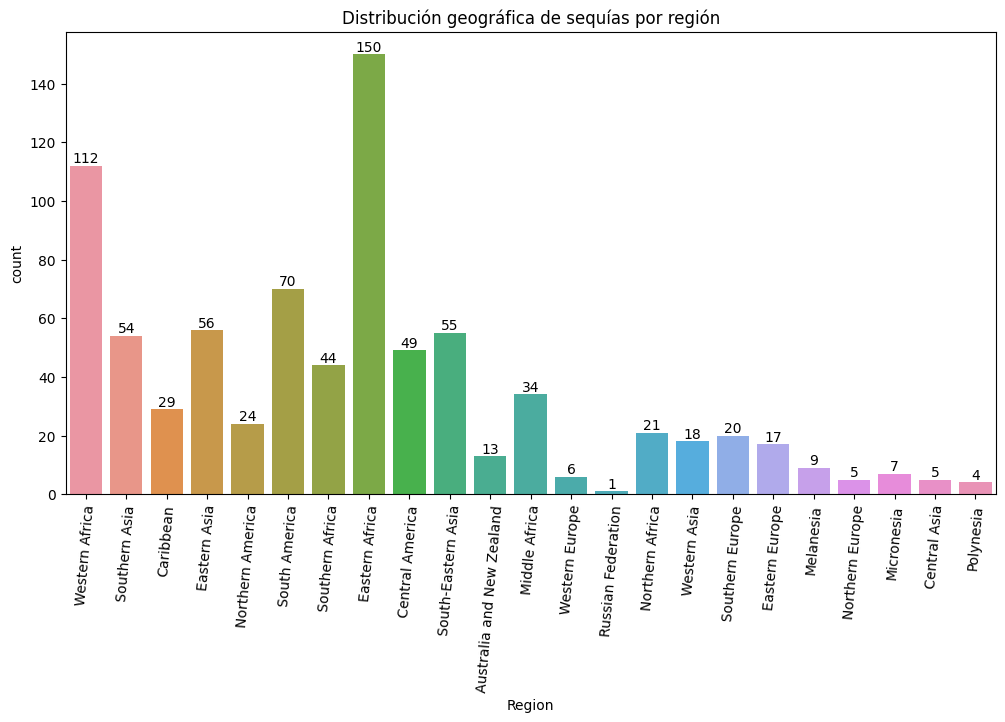

In [68]:
plt.figure(figsize=(12,6))
ax =sns.countplot(data=df_drought_geografical, x= 'Region')
plt.title('Distribución geográfica de sequías por región')
plt.xticks(rotation=85)
ax.bar_label(ax.containers[0]); 

El este y oeste de África son las dos regiones con mayor incidencia de este tipo de desastres

** Distribución de sequías por país

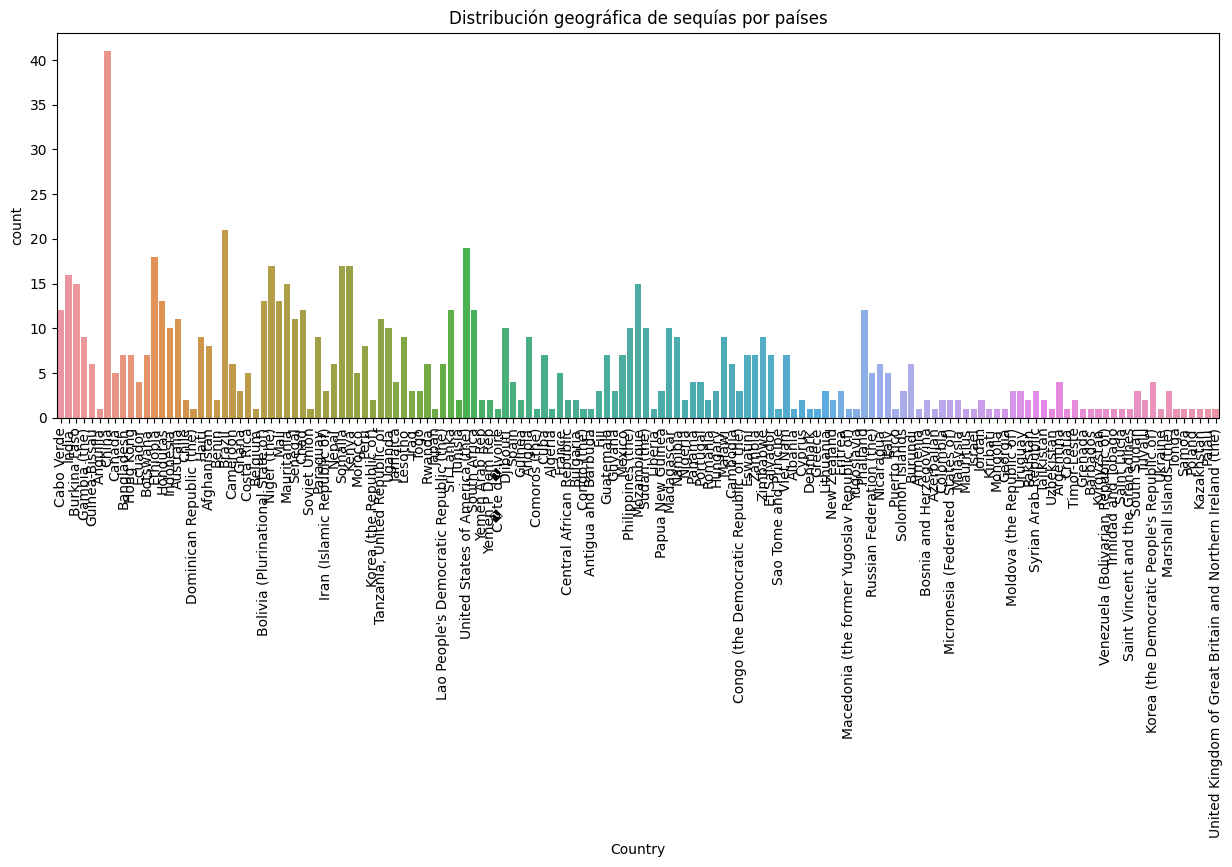

In [73]:
plt.figure(figsize=(15,5))
ax =sns.countplot(data=df_drought_geografical, x= 'Country')
plt.title('Distribución geográfica de sequías por países')
plt.xticks(rotation=90)
plt.show()


In [75]:
top_10_countries = df_drought_geografical['Country'].value_counts().head(10)
top_10_countries

China                             41
Brazil                            21
United States of America (the)    19
Ethiopia                          18
Kenya                             17
Niger (the)                       17
Somalia                           17
India                             16
Mauritania                        15
Mozambique                        15
Name: Country, dtype: int64

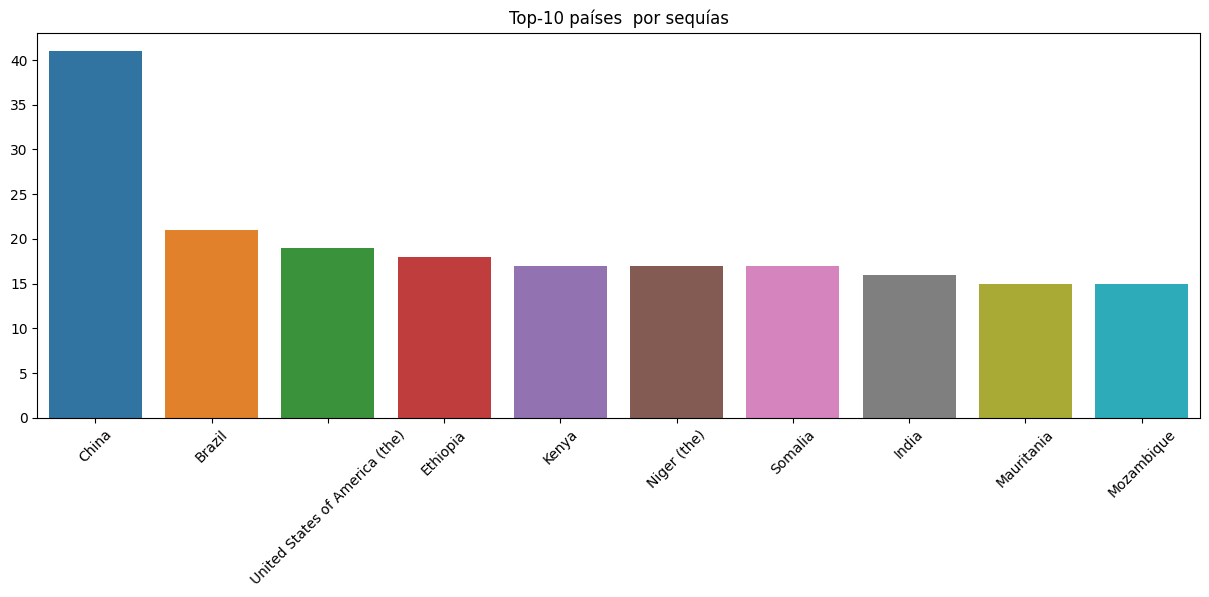

In [91]:
plt.figure(figsize=(15,5))
ax =sns.barplot(y=top_10_countries.values, x=top_10_countries.index)
plt.title('Top-10 países  por sequías')
plt.xticks(rotation=45)
plt.show()

A pesar de que por continente y región el continente africano es el más afectado por las sequías, es China seguido de Brasil y EEUU los países con mayor incidencia de sequías. Hasta el cuarto puesto no aparece un país africano

** Distribución de sequías por ubicación

In [93]:
df_drought_geografical['Location'].unique()

array(['Countrywide', 'Bengal', nan, 'North', 'Shensi, Honan, Kansu',
       'Prairie provinces, Western Canada', 'Nicolau, Fogo, Sao Tiago',
       'Calcutta, Bengal region', 'Western Canada', 'Mysore',
       'Rajasthan, center', 'Nationwide except south', 'Nationwide',
       'Central, South-West', 'South Valle, Choluteca', 'Lombok, South',
       'South-East', 'Nationwide, Central Valley, Central Chile',
       'Northwestern region', 'North West Peninsula', 'Paktia province',
       'Entire country', 'East, North of Ougadougou. Northern section',
       'Hamasion division', 'Northeast',
       'Central, North-West, North-East, West regions',
       'Central Java, Southern Isles', 'Central',
       'Tigre, Wollo, North Shoa, Tigray, Kangra provinces',
       'Laguna Arenal', 'Central New South Wales', 'Northwest',
       'Northwest Peninsula',
       'Victoria, South Australia, Southern Inland New South Wales',
       'Southwest of Western Australia', 'Hong Kong',
       'North, Upp

Debido al alto número de ubicaciones diferentes, vamos a localizar las 10 ubicaciones con mayor frecuencia en presencia de sequías


In [94]:
top_10_locations = df_drought_geografical['Location'].value_counts().head(10)
top_10_locations

Countrywide                    15
Nationwide                     11
North                           4
Central                         3
South                           3
Nei Mongol Zizhiqu province     3
Entire country                  3
Northwest                       2
Southern provinces              2
All country                     2
Name: Location, dtype: int64

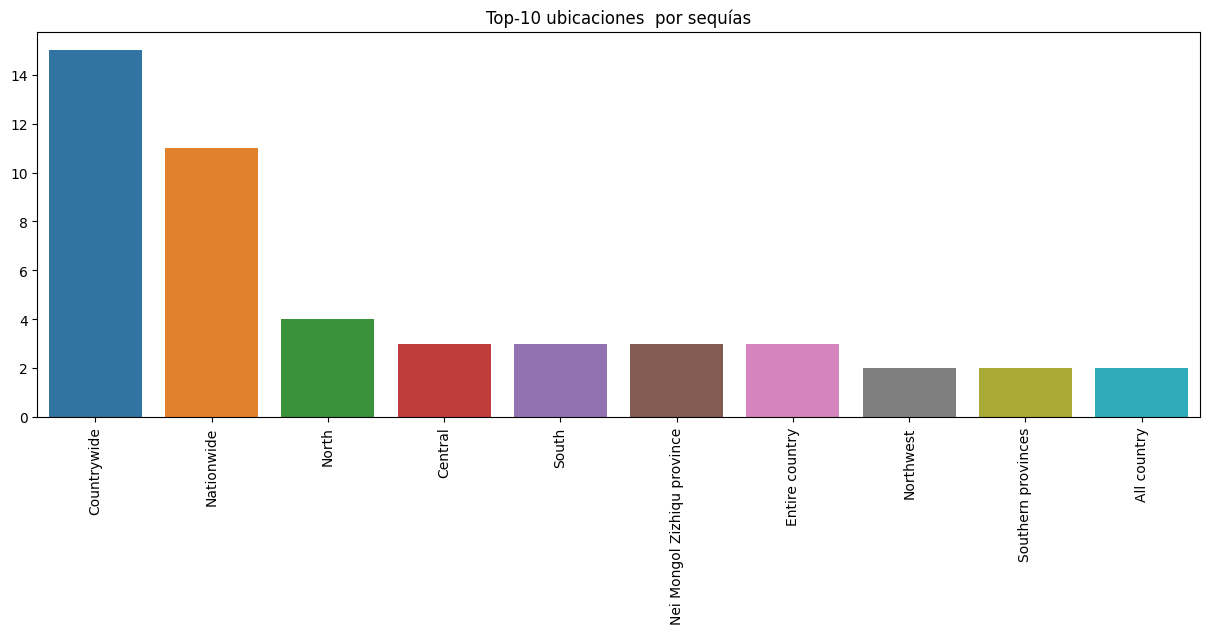

In [95]:
plt.figure(figsize=(15,5))
ax =sns.barplot(y=top_10_locations.values, x=top_10_locations.index)
plt.title('Top-10 ubicaciones  por sequías')
plt.xticks(rotation=90)
plt.show()

Estudiar a que países corresponden esas ubicaciones

In [106]:
df_drought_geografical.groupby('Location')['Continent'].value_counts()

Location                                                                                                                                                                                                                               Continent
23-25 districts affected (almost all the country): All provinces have been selected                                                                                                                                                    Africa       1
42 provinces. 28 provinces in the North and Northeast                                                                                                                                                                                  Asia         1
?milie-Romagne, Frioul-V�n�tie Julienne, Lombardie, V�n�tie et dans le Pi�mont                                                                                                                                                         Europe       1
Abim, Amudat, Kaabong

In [110]:
df_drought_geografical.isnull().sum()

Location     171
Country        0
Region         0
Continent      0
dtype: int64

En 'Location' hay 171 nulos. Tratar o eliminar?? Muchas de las ubicaciones hacen referencia a la totalidad del país, countrywide, a escala nacional(nationwide) habría que cruzar los datos

### * Impacto humano y económico de las sequías

In [115]:
df_drought_impact = df[drought_filter][['Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected']]
df_drought_impact.head(50)

,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
0,11000.0,NaN,NaN,NaN,NaN
1,1250000.0,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN
54,24000.0,NaN,NaN,NaN,NaN
56,500000.0,NaN,20000000.0,NaN,20000000.0
96,3000000.0,NaN,NaN,NaN,NaN


In [114]:
df_drought_impact.isnull().sum()

Total Deaths      732
No Injured        802
No Affected       277
No Homeless       802
Total Affected    277
dtype: int64

Las columnas de heridos y personas sin hogar están vacías. La de personas fallecidas está vacía en casi su totalidad y las únicas más completas son las de afectados y total de afectados

In [116]:
df_drought_impact['Total Deaths'].sum()

11734025.0

Aún sin datos las cifras son elevadísimas

In [117]:
df_drought_impact['Total Deaths'].value_counts()

4.0          2
2.0          2
20.0         2
50.0         2
8.0          2
100000.0     2
600.0        2
2000.0       2
9.0          2
1500000.0    2
20000.0      2
12.0         2
500.0        2
85.0         1
41.0         1
143.0        1
21.0         1
115.0        1
37.0         1
58.0         1
11000.0      1
120.0        1
79.0         1
80.0         1
60.0         1
134.0        1
27.0         1
11.0         1
24.0         1
77.0         1
45.0         1
136.0        1
6.0          1
3000.0       1
672.0        1
237.0        1
24000.0      1
500000.0     1
3000000.0    1
1900000.0    1
30000.0      1
8000.0       1
85000.0      1
1200000.0    1
19000.0      1
18.0         1
300000.0     1
367.0        1
1400.0       1
63.0         1
280.0        1
150000.0     1
230.0        1
84.0         1
300.0        1
200.0        1
1250000.0    1
2465.0       1
Name: Total Deaths, dtype: int64

Hay dos eventos con 1.500.000 de fallecidos, otro con 1.250.000, otro con 3.000.00, otro con 1.900.00,, otro con 1.200.000,

In [118]:
df_drought_impact['No Affected'].sum()

2943181349.0

In [119]:
df_drought_impact['Total Affected'].sum()

2943201381.0

## GROUPBY

In [ ]:
df_drought.groupby('Continent')['Total Deaths'].sum()

In [ ]:
df_drought.groupby('Continent')['Total Deaths'].value_counts()

In [ ]:
sns.countplot(data=df_drought, x='Continent')